In [1]:
# reload modules if they are changed
%load_ext autoreload
%autoreload 2

import os
os.sys.path.insert(0, "/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/project_specific_ipynb_code/bottleneck_project") # so VScode know to look here for modules
os.sys.path.insert(0, "/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework") # so VScode know to look here for modules

# wildcard imports are frowned upon, but oh well, everything is self-contained in this folder anyways
from helper_functions import *
from decoder_helper_functions import *
from viz import *
from data_helper_functions import *
import model_data_base

print("Cuda is available: "+str(torch.cuda.is_available()))

# ip adress of running node
ip = "10.102.3.90"

/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/model_data_base/distributed_lock.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


trying to connect to distributed locking server {'config': {'hosts': 'somalogin02-hs:33333'}, 'type': 'zookeeper'}
success!
Current version: v0.0.1+1004.g7d735fe.dirty
Current pid: 102950
barrel cortex succesfully imported in alayze init


/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3/lib/python3.8/site-packages/pandas_msgpack-0.1.4+14.gfcb0471.dirty-py3.8-linux-x86_64.egg/pandas_msgpack/packers.py:78: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import (Timestamp, Period, Series, DataFrame,  # noqa
/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/Interface.py:180: UserWarning: The source folder has uncommited changes!
  if get_versions()['dirty']: warnings.warn('The source folder has uncommited changes!')


Loading mechanisms:
setting up local multiprocessing framework ... done


Loaded modules with __version__ attribute are:
IPython: 7.19.0, Interface: v0.0.1+1004.g7d735fe.dirty, PIL: 8.2.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, argparse: 1.1, backcall: 0.2.0, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.11.0, dask: 2.30.0, dateutil: 2.8.1, deap: 1.3, decimal: 1.70, decorator: 4.4.2, distributed: 2.30.1, distutils: 3.8.5, fsspec: 0.8.3, future: 0.18.2, ipykernel: 5.3.4, ipython_genutils: 0.2.0, ipywidgets: 7.5.1, jedi: 0.17.1, jinja2: 2.11.2, joblib: 0.17.0, json: 2.0.9, jupyter_client: 6.1.7, jupyter_core: 4.6.3, kazoo: 2.8.0, kiwisolver: 1.3.0, logging: 0.5.1.2, markupsafe: 1.1.1, matplotlib: 3.3.2, mkl: 2.3.0, neuron: 7.8.2, numexpr: 2.7.1, numpy: 1.19.2, pandas: 1.1.3, pandas_msgpack: 0.1.4+14.gfcb0471.dirty, parameters: 0.2.1, parso: 0.7

In [2]:
register_databases(ip)  # change this IP every time

registering database with unique_id 2022-08-29_117057_mvi4MLC to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations
registering database with unique_id 2022-08-29_139830_1aB8K0e to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb
registering database with unique_id 2022-09-07_148835_MCLAx5Q to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb
registering database with unique_id 2022-09-16_72225_QtIPT5M to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb/reduced_ann_models5_9gopetp1_/mdb


Client Scheduler: tcp://10.102.3.90:38786 Dashboard: http://10.102.3.90:38787/status,Cluster Workers: 48 Cores: 48 Memory: 4.80 TB


In [3]:
# init mdb for which batches should be generated
mdb = I.ModelDataBase('/gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/')
mdb._register_this_database()
mdb = mdb['mdbs']
mdb._register_this_database()
mdb = mdb['example_in_distribution_simulation_1ms_INH_adapt_inh_v2.6_shift-3_offset_445_280000_trials']
mdb._register_this_database()
mdb_models = mdb['reduced_ANN_models5']
mdb_models._register_this_database()

batches_dir = mdb[('synapse_activation_binned_v2', '365_505_1', 'EI__section/branch_bin')]

registering database with unique_id 2022-08-29_117057_mvi4MLC to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations
registering database with unique_id 2022-08-29_139830_1aB8K0e to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb
registering database with unique_id 2022-09-07_148835_MCLAx5Q to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb
registering database with unique_id 2022-09-16_72225_QtIPT5M to the absolute path /gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb/example_in_distribution_simulation_1ms_inh_adapt_i_i2melyug_/mdb/reduced_ann_models5_9gopetp1_/mdb


In [4]:
model_data_base.mdbopen.resolve_mdb_path('mdb://2022-08-29_117057_mvi4MLC/morphologies/WR64_Cell8/recSites.landmarkAscii')
mdb_dinuka = I.ModelDataBase('/gpfs/soma_fs/scratch/jayalath/mdb_dinuka/300_epoch_retrain')
mdb_models_dinuka = mdb_dinuka['retrain_test_5_times_300_epochs']
mdb_models_arco = mdb['reduced_ANN_models5']

In [5]:
model_dinuka = 'loss_sAP__bn_1__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__CTY70'
model_arco = 'loss_sAP__bn_1__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__1HOE2'

In [6]:
client = I.distributed.Client(ip+':38786')
client

Client Scheduler: tcp://10.102.3.90:38786 Dashboard: http://10.102.3.90:38787/status,Cluster Workers: 48 Cores: 48 Memory: 4.80 TB


# Visualize the weights

In [13]:
# define params to visualize the weights
params={
    "n_celltypes": 2,
    "n_spatial_bins": 260,
    "temporal_window_width": 80,
    "weight_scaling": 1
}

show_bins = False
bottleneck_size = 1
celltype = 0 # EXC or INH in the plot
ts = range(params["temporal_window_width"])
t = 70

In [14]:
from viz import WeightPlot
WP = WeightPlot(mdb)

-------------------------------
Starting setup of cell model...
Loading cell morphology...
Reading hoc file mdb://2022-08-29_117057_mvi4MLC/morphologies/WR64_Cell8/WR64_Cell8_L5TT_C2-registered.hocwith_radius_constant_mean.hoc
Creating AIS:
    axon hillock diameter: 3.00
    initial segment diameter: 1.75
    myelin diameter: 1.00
Setting up biophysical model...
    Adding membrane properties to Myelin
    Adding membrane properties to Soma
    Adding membrane properties to AIS
    Adding membrane properties to Dendrite
    Adding membrane properties to ApicalDendrite
    Setting up spatial discretization...
    frequency used for determining discretization: 100.0
    maximum segment length: None
    Total number of compartments in model: 830
    Total length of model cell: 10451.70
    Average compartment length: 12.59
    Maximum compartment (ApicalDendrite) length: 40.81
    Adding membrane range mechanisms to Myelin
        Inserting mechanism pas with spatial distribution uniform

torch.Size([1, 41600])


<Figure size 720x360 with 0 Axes>

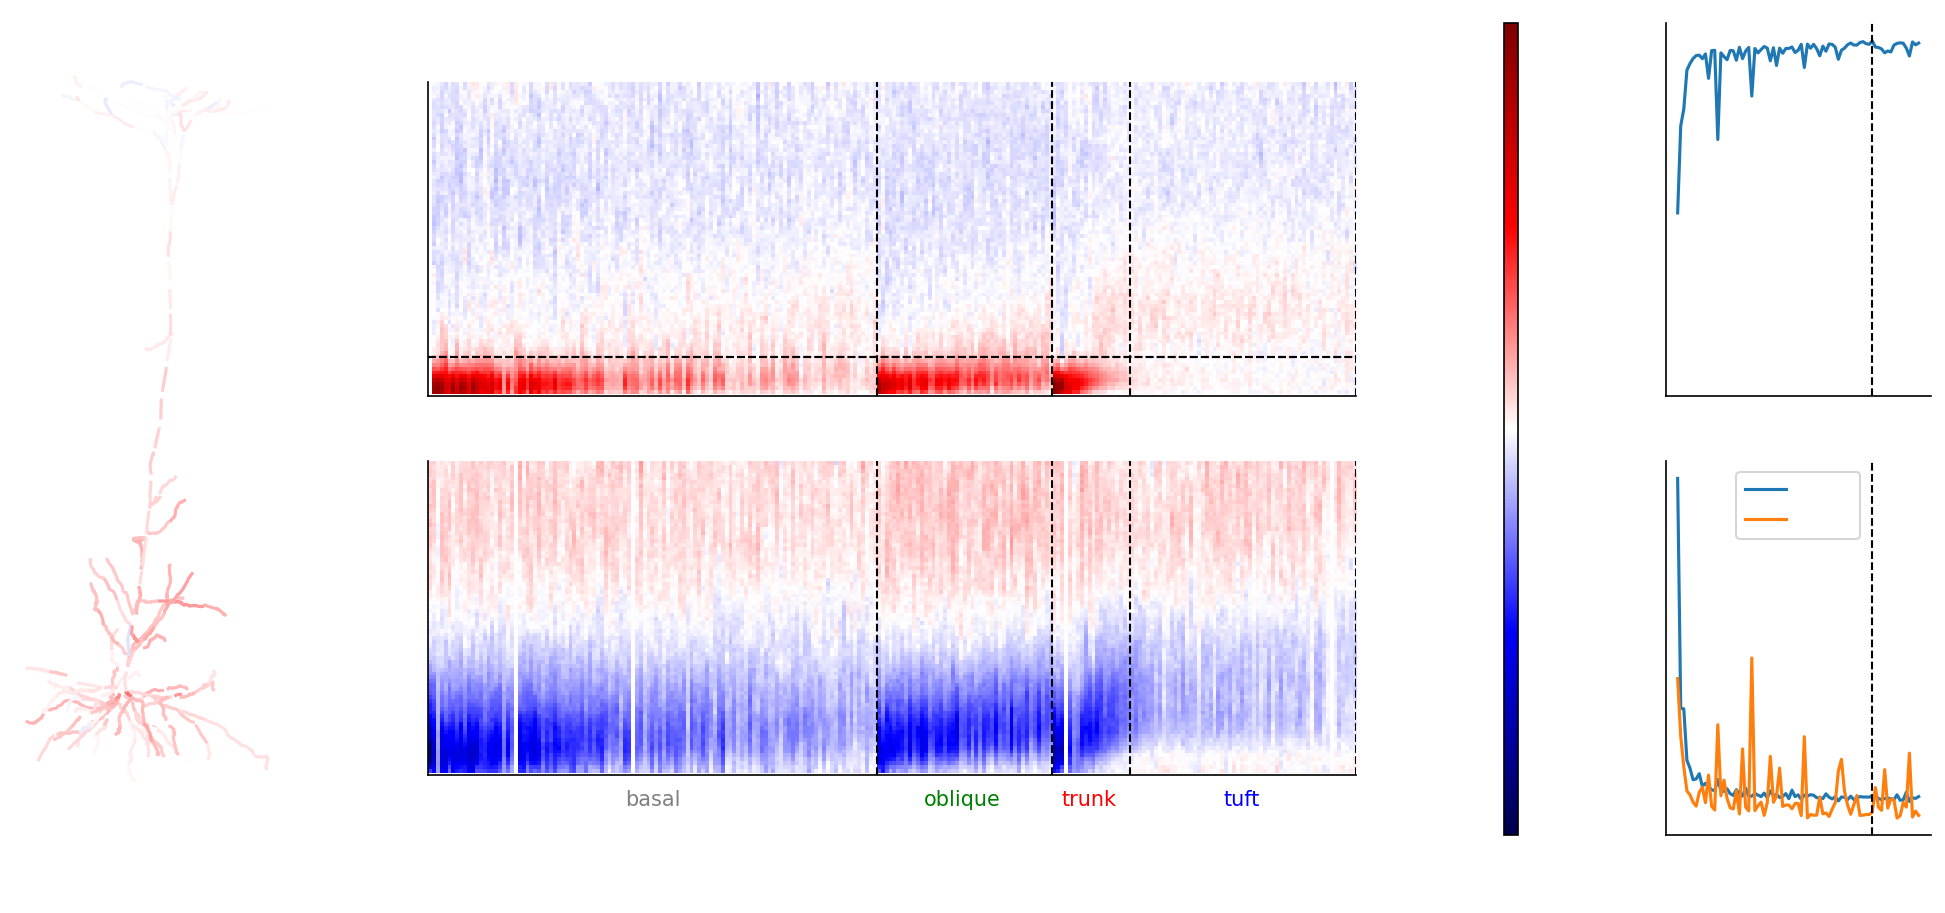

In [18]:
%matplotlib inline
import matplotlib as mpl
COLOR = 'white'  # for VSCode
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_dinuka, model_dinuka)

bottleneck_node = 0

I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[celltype,1].axhline(t, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

torch.Size([1, 41600])


<Figure size 720x360 with 0 Axes>

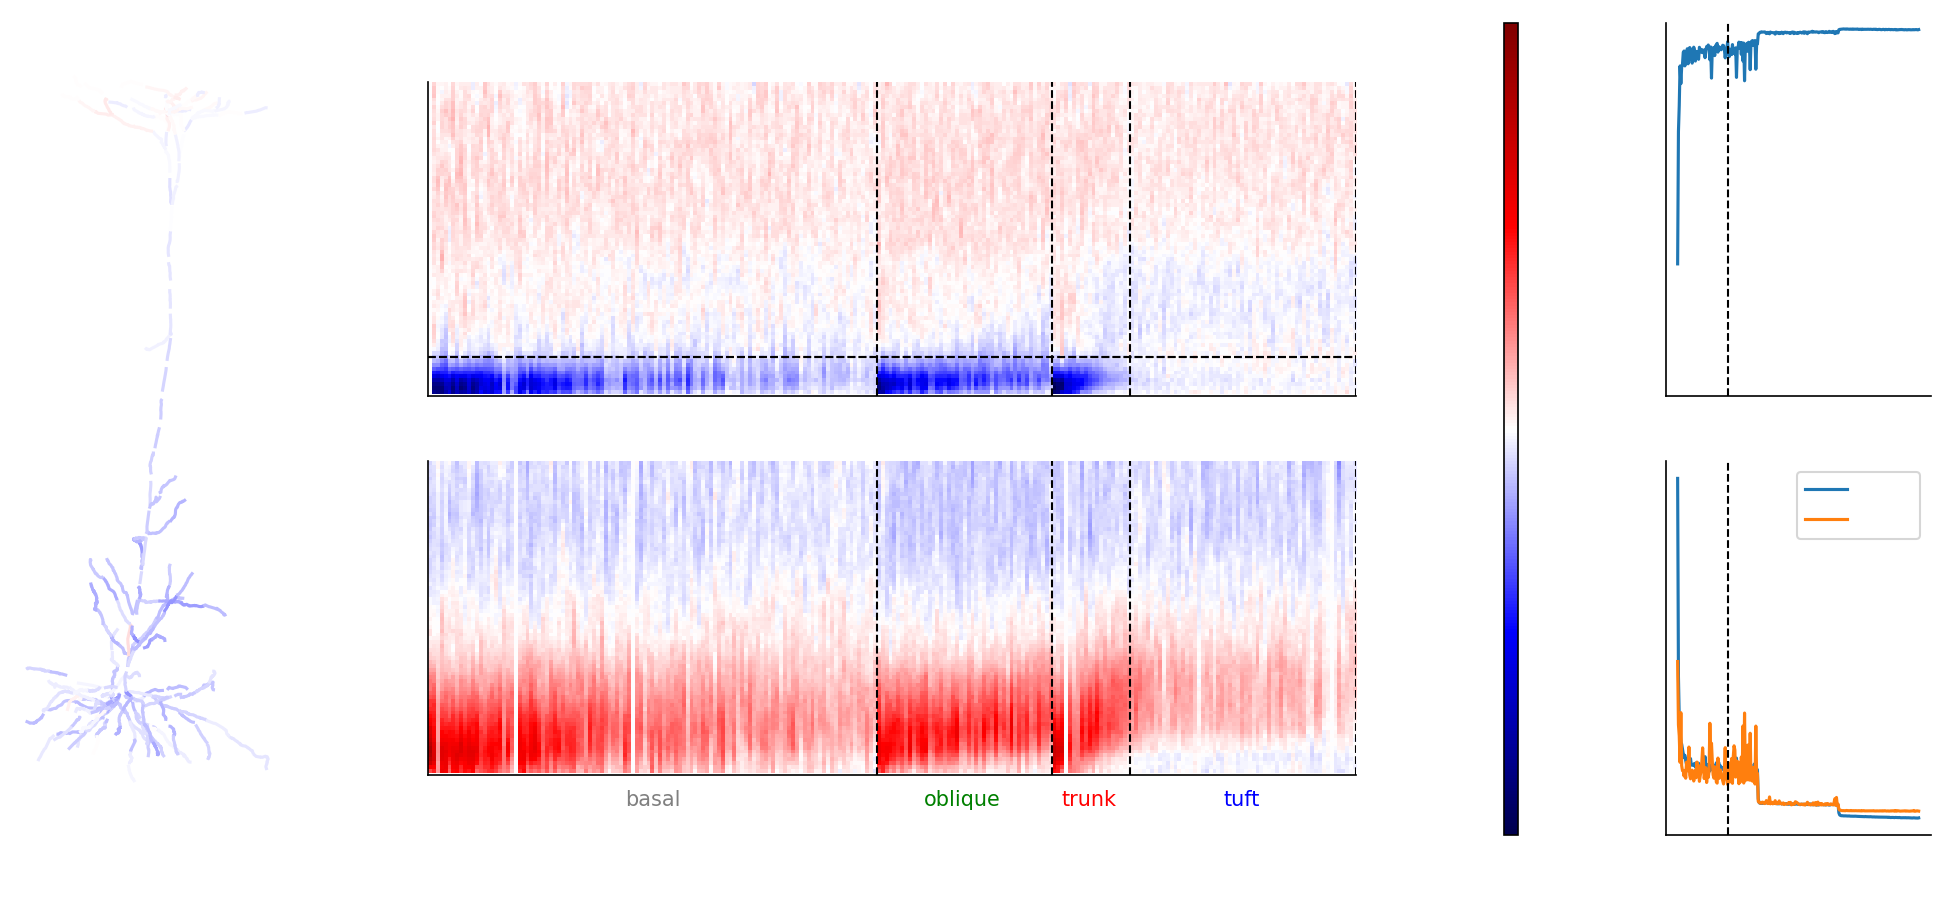

In [19]:
i = 64  # best_epoch
bottleneck_node = 0
epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco, best_epoch=i, bottleneck_node=bottleneck_node)


I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[celltype,1].axhline(t, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

torch.Size([1, 41600])


<Figure size 720x360 with 0 Axes>

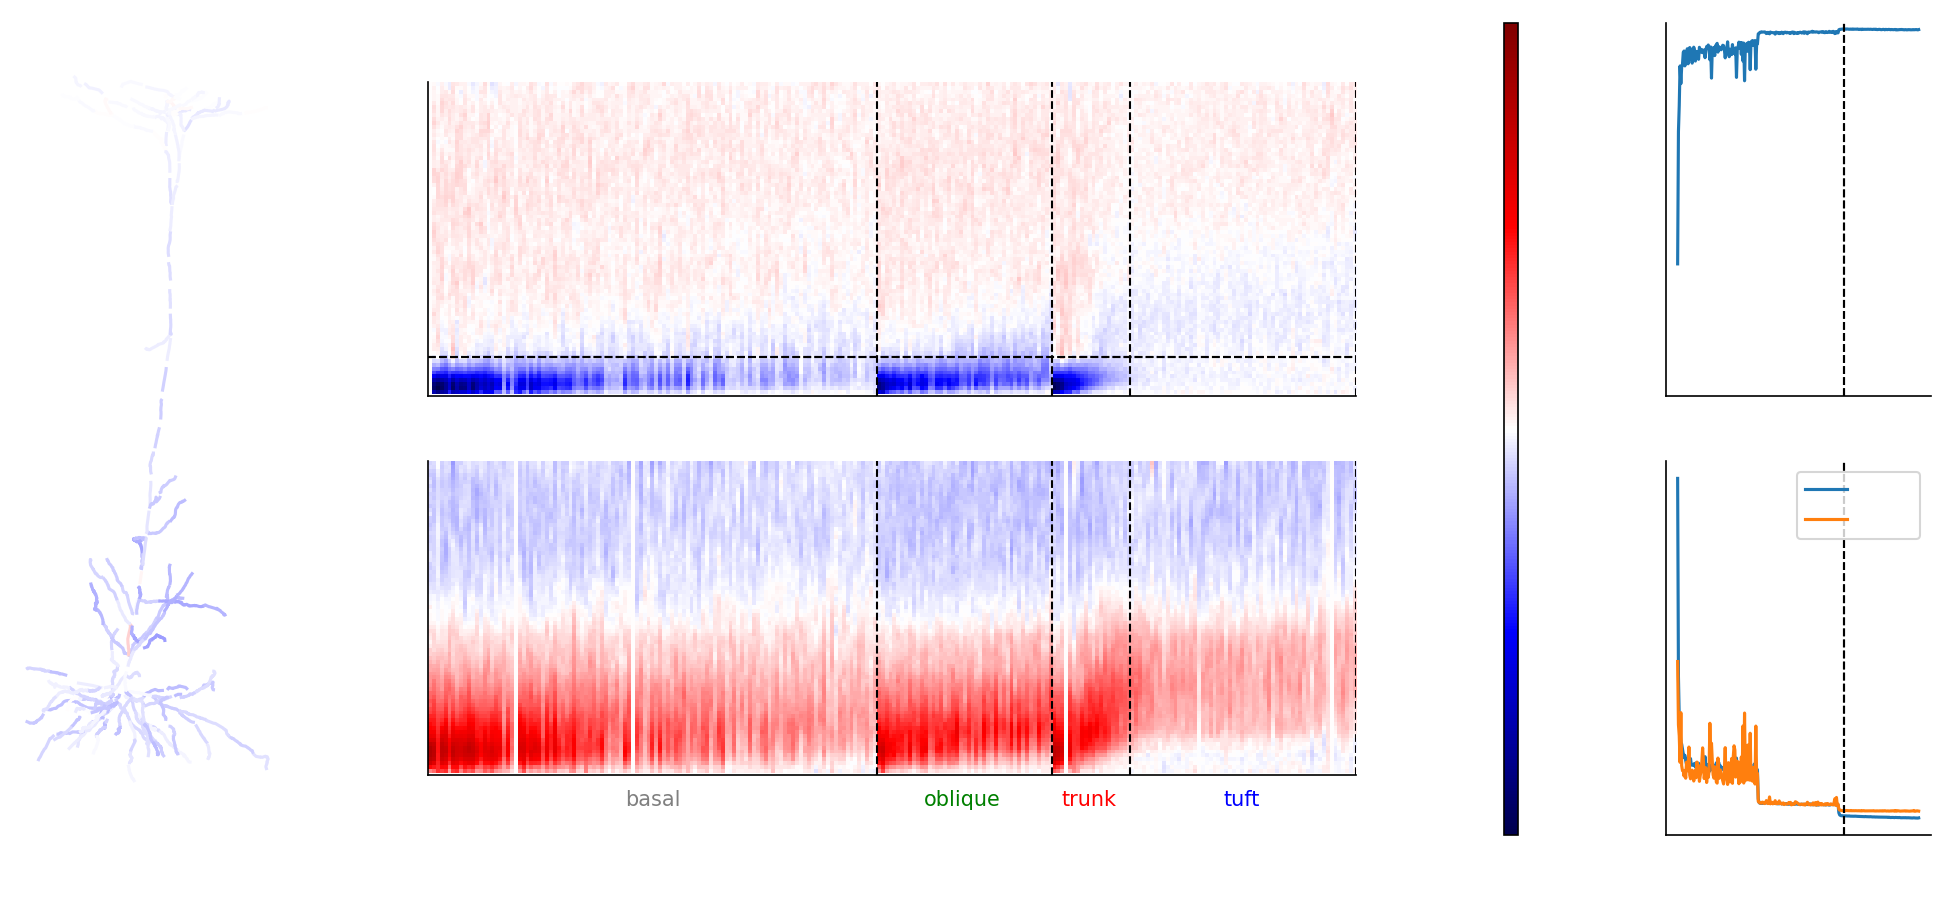

In [20]:
epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco)

bottleneck_node = 0

I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t, i=i)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[celltype,1].axhline(t, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

In [ ]:
# make a video
# def plot_weights_at_t(t):
#     epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco)
#     WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=t,
#                           return_axes=False)  # to make interactive plot
#     I.plt.title(f"Time: {t}")
#     I.plt.savefig("frames/{:03d}.png".format(t), dpi=100)
#     I.plt.close()
    
# for t in range(80):
#     plot_weights_at_t(t)

torch.Size([2, 41600])


<Figure size 720x360 with 0 Axes>

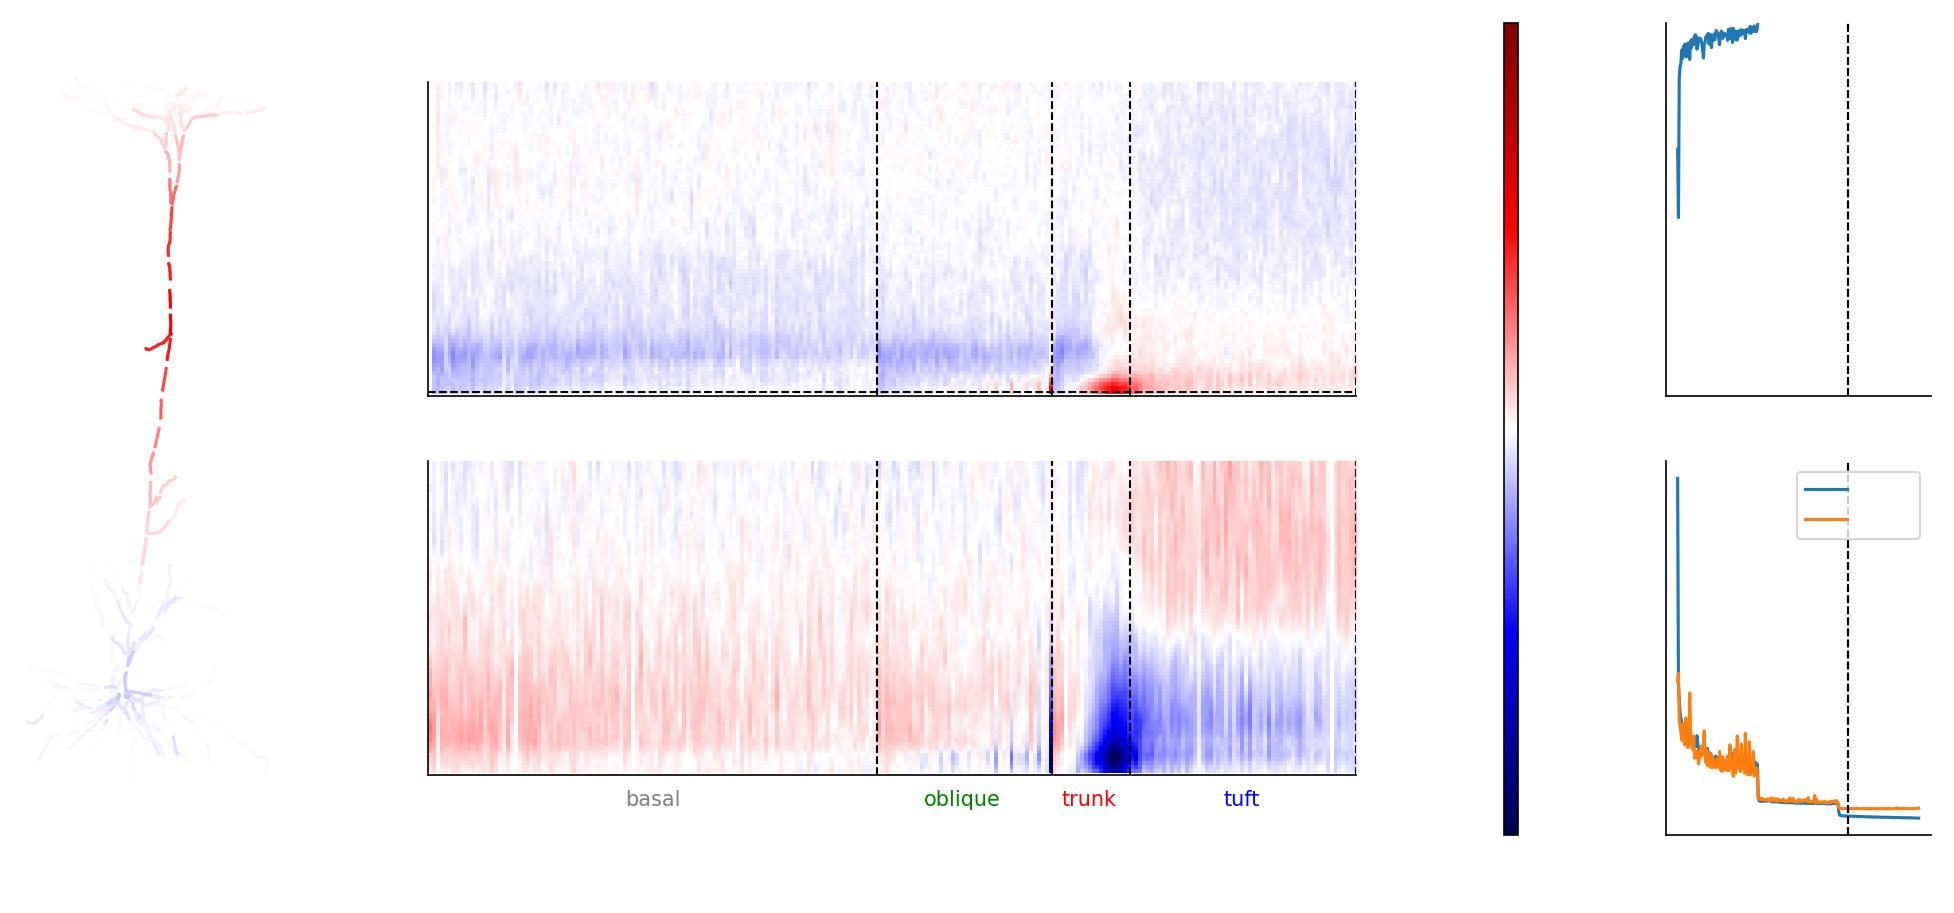

In [53]:
model_arco_2layer = "loss_sAP_dAP__bn_2__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__MD4TW"

epochs, i, AUCs, train_loss, test_loss, weights = get_model_stats(mdb_models_arco, model_arco_2layer, bottleneck_node=0)


I.plt.figure(figsize = (10,5))
axes = WP.plot_weights(weights, **params, categories=False, AUCs=AUCs, train_loss=train_loss, test_loss=test_loss, celltype=celltype, t=79, i=i)
title = 'history: {} ms'.format(-ts[t]-1)
axes[0,1].set_title(title)
axes[0,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)
axes[1,3].axvline(i-1, color = 'k', linestyle = '--', linewidth = 1)

I.plt.show()

# Visualizing the decoder network

In [7]:
from decoder_helper_functions import forward, forward_bottleneck, forward_decoder

In [8]:
model_arco = 'loss_sAP__bn_1__ISIsd__width_min_max_80_0_60__decoder_5x40__L2_0.001_L1_0_TV_0.001__epochs_300__batches_200__ntrials_280000__traintest_260000_20000__1HOE2'
model = get_model(mdb_models_arco, model_arco)
model.to('cpu')

Model(
  (relu): ReLU()
  (linear1): Linear(in_features=41600, out_features=1, bias=False)
  (bottleneck_layer): Linear(in_features=3, out_features=40, bias=True)
  (layer_asd_0): Linear(in_features=40, out_features=40, bias=True)
  (layer_asd_1): Linear(in_features=40, out_features=40, bias=True)
  (layer_asd_2): Linear(in_features=40, out_features=40, bias=True)
  (layer_asd_3): Linear(in_features=40, out_features=40, bias=True)
  (layer_asd_4): Linear(in_features=40, out_features=40, bias=True)
  (output_layer): Linear(in_features=40, out_features=1, bias=True)
)

In [9]:
SA, ISI_SOMA, AP_SOMA, VT_SOMA, ISI_DEND, AP_DEND, VT_DEND = load_data_uncached(batches_dir)
decoder_params = {
    "AP_SOMA": AP_SOMA,
    "AP_DEND": AP_DEND,
    "ISI_SOMA": ISI_SOMA,
    "ISI_DEND": ISI_DEND,
    "VT_SOMA": VT_SOMA,
    "VT_DEND": VT_DEND,
    "SA": SA,
    "temporal_window_width": 80
}

Loaded batch 0
Loaded batch 1
Loaded batch 2
Loaded batch 3
Loaded batch 4
Loaded batch 5
Loaded batch 6
Loaded batch 7
Loaded batch 8
Loaded batch 9


In [22]:
soma_isi, bottleneck_out, model_out = get_decoder_info(**decoder_params, model=model)

100%|██████████| 60/60 [00:16<00:00,  3.70it/s]


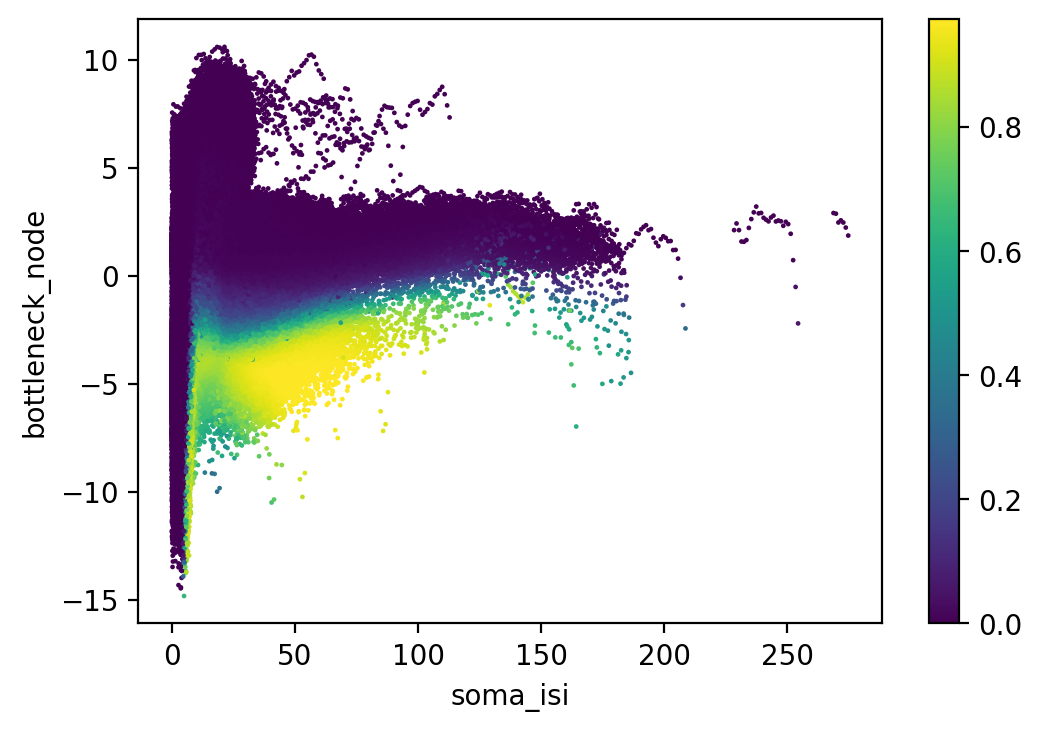

In [23]:
%matplotlib inline

# I.plt.rcParams['axes.facecolor'] = 'white'

I.plt.figure(dpi = 200)
I.plt.scatter(soma_isi, bottleneck_out[:,0], s=0.5, c=model_out)
I.plt.xlabel('soma_isi')
I.plt.ylabel('bottleneck_node')
I.plt.colorbar()

## Novelty detection

In [12]:
from sklearn.neighbors import LocalOutlierFactor
data = np.array([soma_isi[:,0], bottleneck_out[:,0]]).T

lof = LocalOutlierFactor(novelty=True)
lof.fit(data)

LocalOutlierFactor(novelty=True)

In [13]:
mdb_figs = I.ModelDataBase('/gpfs/soma_fs/scratch/meulemeester/kde')
mdb_figs.create_managed_folder('figures')

MdbException: Key figures is already set. Please use del mdb[figures] first

/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


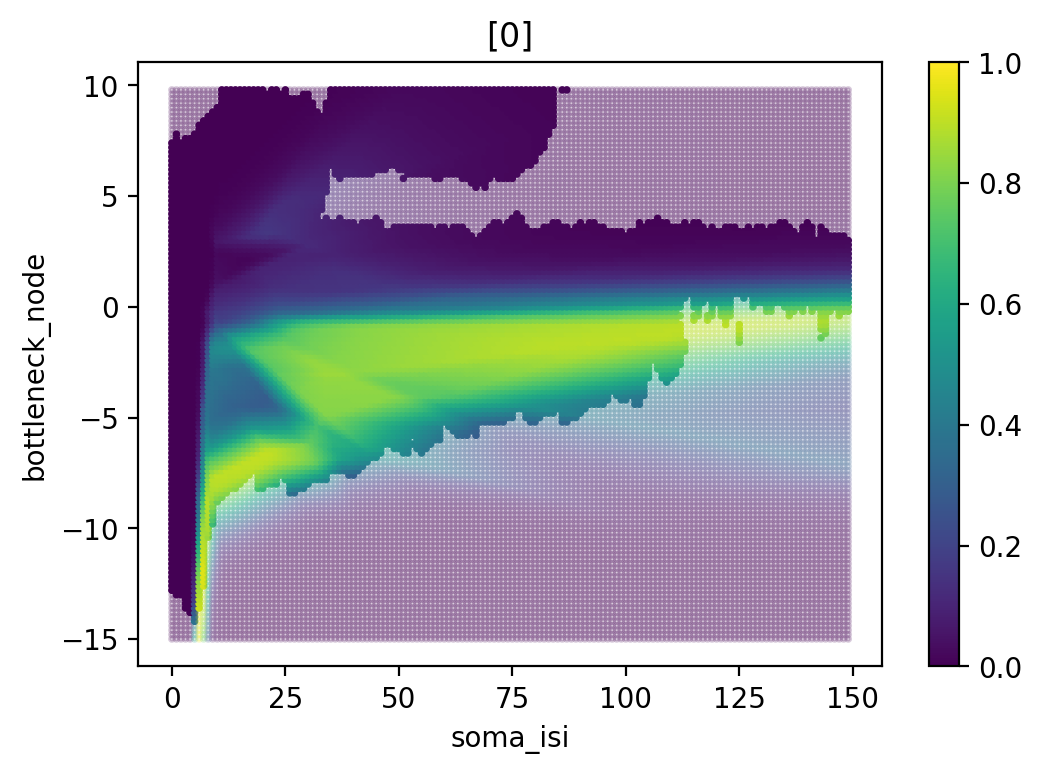

In [45]:
from decoder_helper_functions import cartesian_product

cb = I.plt.get_cmap('viridis')
lof = LocalOutlierFactor(novelty=True)


outdir = mdb_figs.create_managed_folder('figures', raise_ = False)
for dend_ISI in range(0,150):  # TODO change range to 150
    bottleneck_values = I.np.arange(-15,10,0.2)
    soma_isi = I.np.arange(-0,150,1)
    ISI_dend_values = I.np.array([dend_ISI])
    decoder_input = cartesian_product(bottleneck_values,soma_isi, ISI_dend_values)
    decoder_input_torch = torch.Tensor(decoder_input)
    model_out_torch = forward_decoder(model,decoder_input_torch)
    model_out_torch = torch.sigmoid(model_out_torch)
    model_out = model_out_torch.cpu().detach().numpy()

    lof.fit(data)
    to_score = np.array([decoder_input[:,1],decoder_input[:,0]]).T
    scores  = lof.predict(to_score)
    c = [cb(model_out[i])[0] if scores[i] > 0 else 
            np.append(cb(model_out[i])[0][:3], .2) for i in range(len(scores))]  # set alpha to .2
    I.plt.figure(dpi = 200)
    I.plt.scatter(decoder_input[:,1], decoder_input[:,0], s=3, c=c)
    I.plt.xlabel('soma_isi')
    I.plt.ylabel('bottleneck_node')
    I.plt.title(ISI_dend_values)
    I.plt.colorbar()
    I.plt.savefig(outdir.join('{}.png'.format(dend_ISI)))
    I.plt.show()